In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

data read

In [4]:
data = pd.read_csv("/content/Melbourne_housing_FULL.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


data cleaning

In [5]:
features = ["Rooms","Distance","Bedroom2","Bathroom"]
target = "Price"

In [9]:
data_simple = data[features+[target]].copy()
data_simple.head()

,Rooms,Distance,Bedroom2,Bathroom,Price
0,2,2.5,2.0,1.0,NaN
1,2,2.5,2.0,1.0,1480000.0
2,2,2.5,2.0,1.0,1035000.0
3,3,2.5,3.0,2.0,NaN
4,3,2.5,3.0,2.0,1465000.0


In [10]:
data_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     34857 non-null  int64  
 1   Distance  34856 non-null  float64
 2   Bedroom2  26640 non-null  float64
 3   Bathroom  26631 non-null  float64
 4   Price     27247 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.3 MB


In [11]:
data_simple.isnull().sum()

,0
Rooms,0
Distance,1
Bedroom2,8217
Bathroom,8226
Price,7610


In [12]:
data_simple = data_simple.dropna()

In [13]:
data_simple.isnull().sum()

,0
Rooms,0
Distance,0
Bedroom2,0
Bathroom,0
Price,0


In [15]:
data.shape

(34857, 21)

In [16]:
data_simple.shape

(20800, 5)

In [18]:
data_simple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20800 entries, 1 to 34856
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     20800 non-null  int64  
 1   Distance  20800 non-null  float64
 2   Bedroom2  20800 non-null  float64
 3   Bathroom  20800 non-null  float64
 4   Price     20800 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 975.0 KB


# exploratoy Data analysis

<Axes: xlabel='Price', ylabel='Count'>

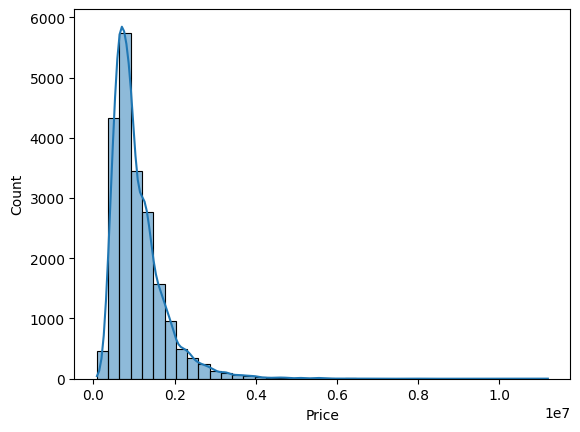

In [23]:
sns.histplot(data_simple["Price"],kde=True,bins=40)

In [24]:
cor_matrix = data_simple.corr()
cor_matrix

,Rooms,Distance,Bedroom2,Bathroom,Price
Rooms,1.000000,0.280091,0.958720,0.607968,0.444840
Distance,0.280091,1.000000,0.282914,0.140767,-0.236455
Bedroom2,0.958720,0.282914,1.000000,0.605309,0.430296
Bathroom,0.607968,0.140767,0.605309,1.000000,0.429878
Price,0.444840,-0.236455,0.430296,0.429878,1.000000


<Axes: >

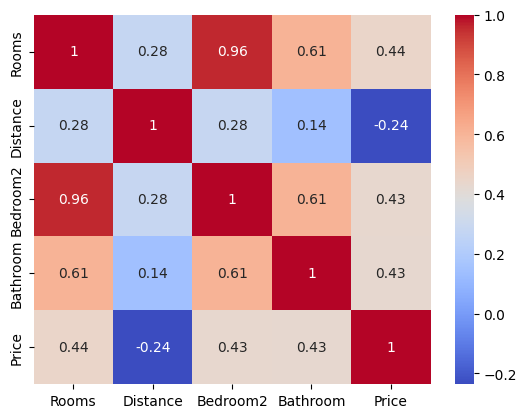

In [27]:
sns.heatmap(cor_matrix, annot = True, cmap = "coolwarm")

# Model creation

In [28]:
X = data_simple[features]
y = data_simple[target]

In [30]:
y.head()

,Price
1,1480000.0
2,1035000.0
4,1465000.0
5,850000.0
6,1600000.0


In [31]:
x_train , x_test , y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [32]:
x_train.shape

(18720, 4)

In [33]:
x_test.shape

(2080, 4)

# Scale the data

In [34]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
x_train_scaled

array([[-1.12018377, -0.47316727, -1.09226269, -0.84270644],
       [-0.06243647,  1.02438569, -0.04508674,  0.58713717],
       [-1.12018377, -1.37460692, -1.09226269, -0.84270644],
       ...,
       [-2.17793106, -1.27283148, -2.13943865, -0.84270644],
       [-1.12018377,  0.37011498, -1.09226269,  0.58713717],
       [ 0.99531082, -1.34552822,  1.00208921, -0.84270644]])

# Model TRAINING

In [36]:
model = LinearRegression()

In [37]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [41]:
y_pred = model.predict(x_test_scaled)

# Model Evaluation

In [42]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

372611.9747491492


In [43]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

337383406068.3701
